# Predictive Modeling for Caloric Expenditure

This notebook explores the task of predicting caloric expenditure based on various user characteristics and exercise features. The dataset used is a combination of information from two sources: individual user profiles and exercise-related data.

## Dataset Overview
- **User Profile Data:** Contains information such as age, height, weight, and gender for each user.
- **Exercise Data:** Includes details on exercise sessions, including duration and heart rate.

## Data Preprocessing
1. **Merging Datasets:** Combining user profile and exercise data using the User_ID as a common identifier.
2. **Handling Outliers:** Detecting and capping outliers in specific features like height, weight, and body temperature.
3. **Encoding Categorical Variables:** Utilizing one-hot encoding for the 'Gender' variable.

## Exploratory Data Analysis (EDA)
1. **Distribution Analysis:** Examining the distribution of key features.
2. **Outlier Visualization:** Visualizing outliers using box plots.
3. **Correlation Analysis:** Investigating the correlation between features and the target variable.

## Model Building
1. **Data Splitting:** Dividing the dataset into training and testing sets.
2. **Feature Selection:** Identifying and dropping highly correlated features.
3. **XGBoost Regression Model:** Training an XGBoost regressor for predicting caloric expenditure.

## Model Evaluation
1. **Mean Absolute Error (MAE):** Assessing model performance on both the training and test sets.
2. **Overfitting Analysis:** Comparing MAE values to identify potential overfitting.




In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from xgboost import XGBRegressor


C:\Users\Chamika Jayasinghe\AppData\Local\Temp\ipykernel_11812\1349324739.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


#### Kaggle Dataset link
* https://www.kaggle.com/datasets/fmendes/fmendesdat263xdemos

In [2]:
df1 = pd.read_csv('calories.csv')

In [3]:
df1.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [4]:
df2 = pd.read_csv('exercise.csv')
df2.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


### Merging the 2 dataframes

In [5]:
df = pd.merge(df2, df1, on='User_ID')
df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [7]:
df.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


Gender
female    7553
male      7447
Name: count, dtype: int64


<Axes: xlabel='count', ylabel='Gender'>

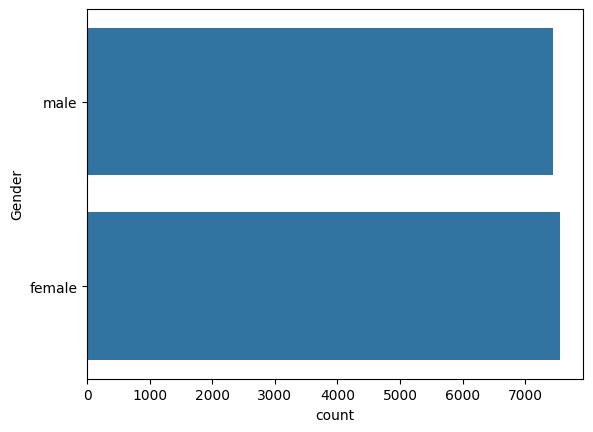

In [8]:
print(df["Gender"].value_counts())
sns.countplot(df["Gender"])  # countplots are best for categorical data

* Almost equal distribution of male and female

### Check out  the distribution  

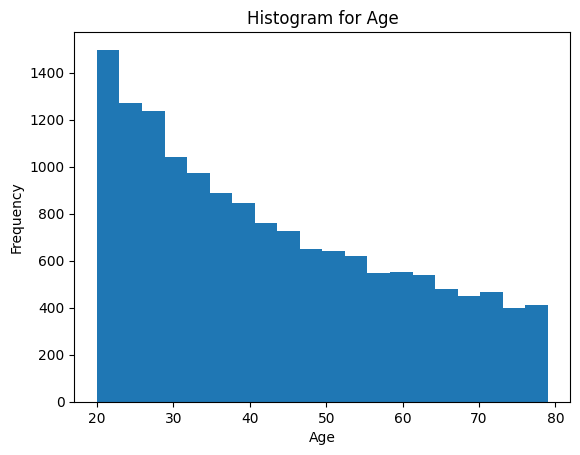

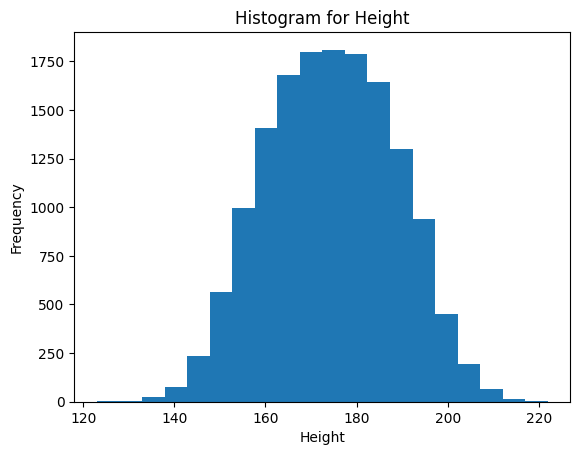

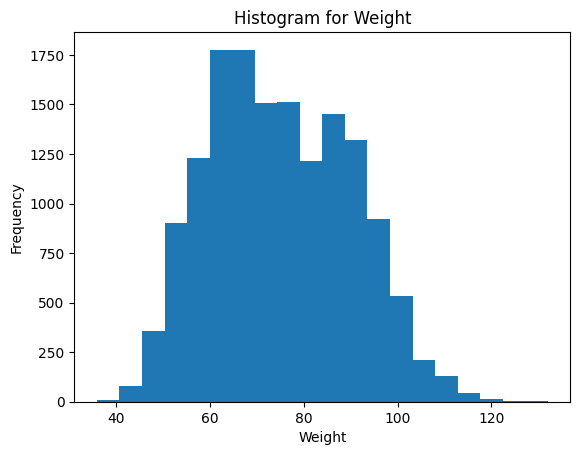

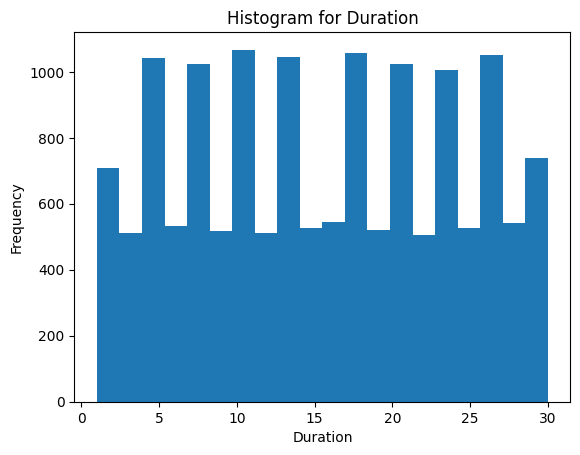

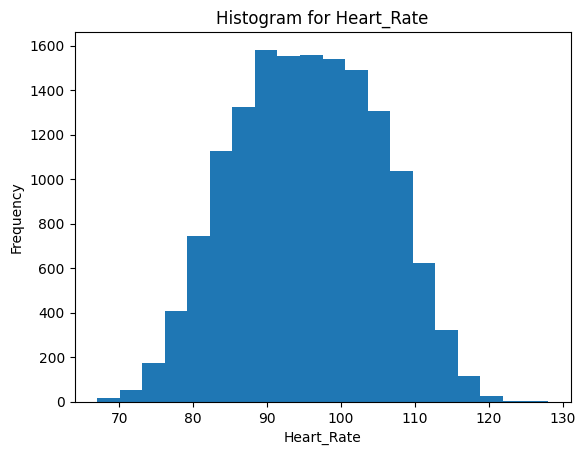

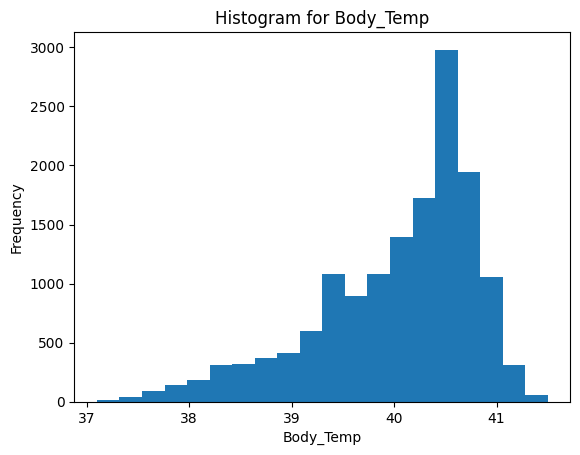

<Figure size 640x480 with 0 Axes>

In [9]:
numeric_features = ["Age", "Height", "Weight", "Duration", "Heart_Rate", "Body_Temp"]
for column in numeric_features:
    plt.hist(df[column], bins=20)  
    plt.title(f'Histogram for {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()
    
plt.tight_layout()


### Outliers

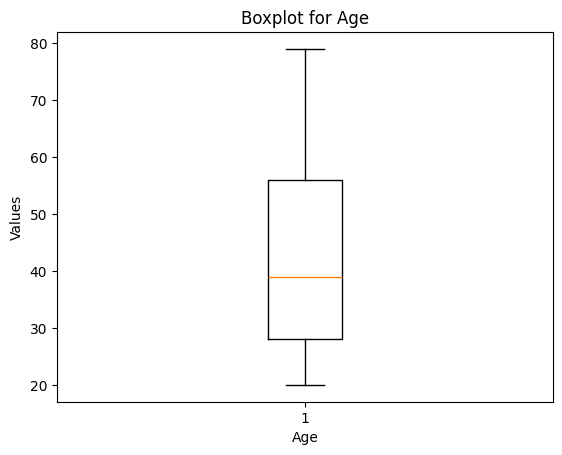

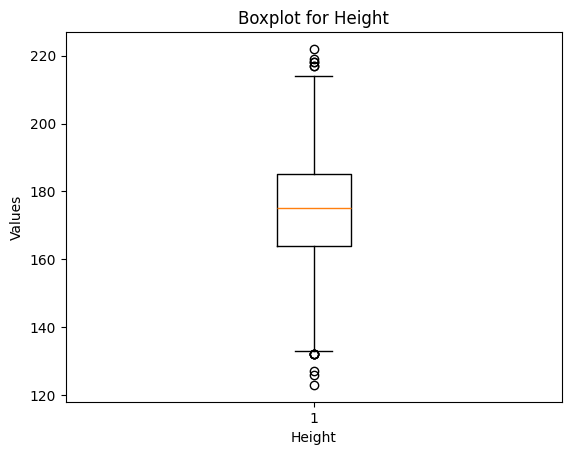

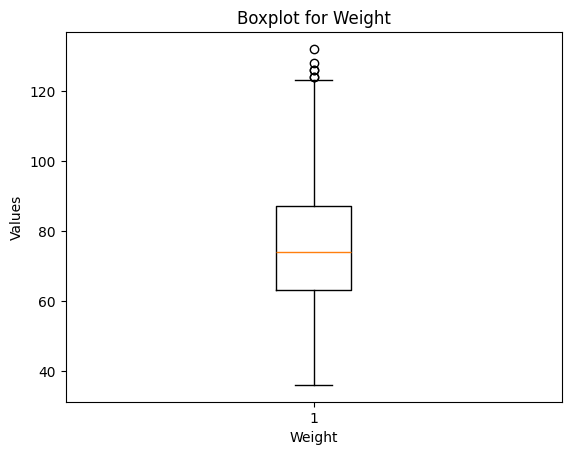

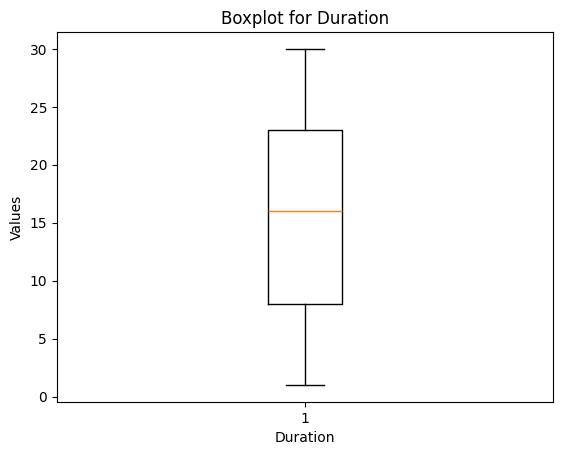

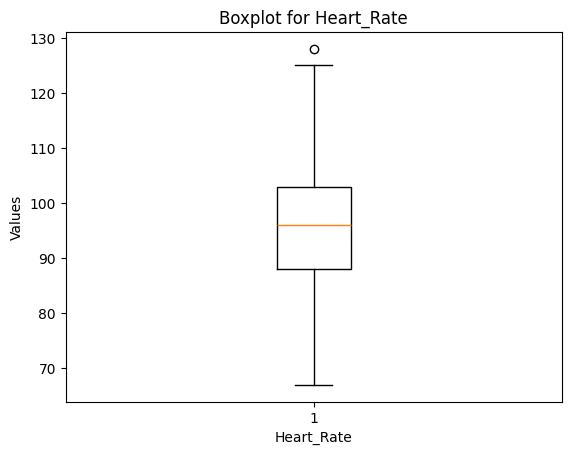

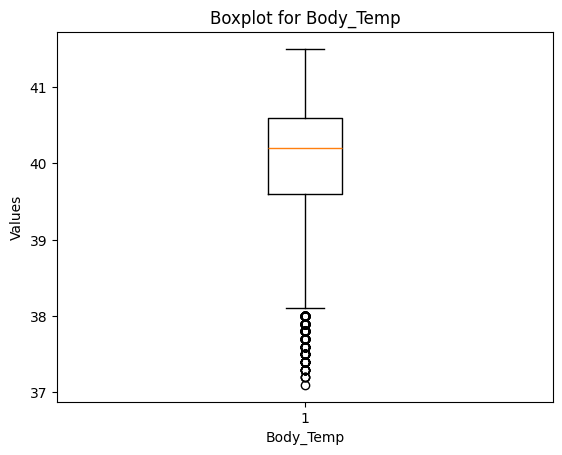

In [10]:
for column in numeric_features:
    plt.boxplot(df[column])
    plt.title(f'Boxplot for {column}')
    plt.xlabel(column)
    plt.ylabel('Values')
    plt.show()

In [11]:
cols_with_outliers = ["Height", "Weight", "Body_Temp"]

for col in cols_with_outliers:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_cap = Q1 - 1.5 * IQR
    upper_cap = Q3 + 1.5 * IQR
    
    # Check if the value falls outside the capped range
    is_outlier = (df[col] < lower_cap) | (df[col] > upper_cap)  # This identifies the rows where the values are outliers based on the previously defined limits.

    # Cap the outlier values
    df.loc[is_outlier & (df[col] < lower_cap), col] = lower_cap  # Setting lower cap for values below the range in this particular column
    df.loc[is_outlier & (df[col] > upper_cap), col] = upper_cap  # Setting upper cap for values above the range in this particular column
    




### Encoding Gender type to numeric

* Here do not use label encoding as it will give a wrong impression because gender has no ordinal relationship
* Use one hot encoding instead


In [12]:
# Use one hot encoding on Gender column
df = pd.get_dummies(df, columns=["Gender"], prefix="Gender", dtype="int64")

In [13]:
df.head()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,Gender_female,Gender_male
0,14733363,68,190.0,94.0,29.0,105.0,40.8,231.0,0,1
1,14861698,20,166.0,60.0,14.0,94.0,40.3,66.0,1,0
2,11179863,69,179.0,79.0,5.0,88.0,38.7,26.0,0,1
3,16180408,34,179.0,71.0,13.0,100.0,40.5,71.0,1,0
4,17771927,27,154.0,58.0,10.0,81.0,39.8,35.0,1,0


### Splitting the data

In [14]:
X = df.drop(columns=["User_ID", "Calories"])
Y = df["Calories"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)   # Splitting the data into training and testing sets



In [15]:
print(X.shape, X_train.shape, X_test.shape)  

(15000, 8) (12000, 8) (3000, 8)


### Corelation

* The logic behind using correlation for feature selection is that good variables correlate highly with the target. Furthermore, variables should be correlated with the target but uncorrelated among themselves.

* If two variables are correlated, we can predict one from the other. Therefore, if two features are correlated, the model only needs one, as the second does not add additional information. 

* For the original dataset (see how the target variable (calories) is related to the other variables)

<Axes: >

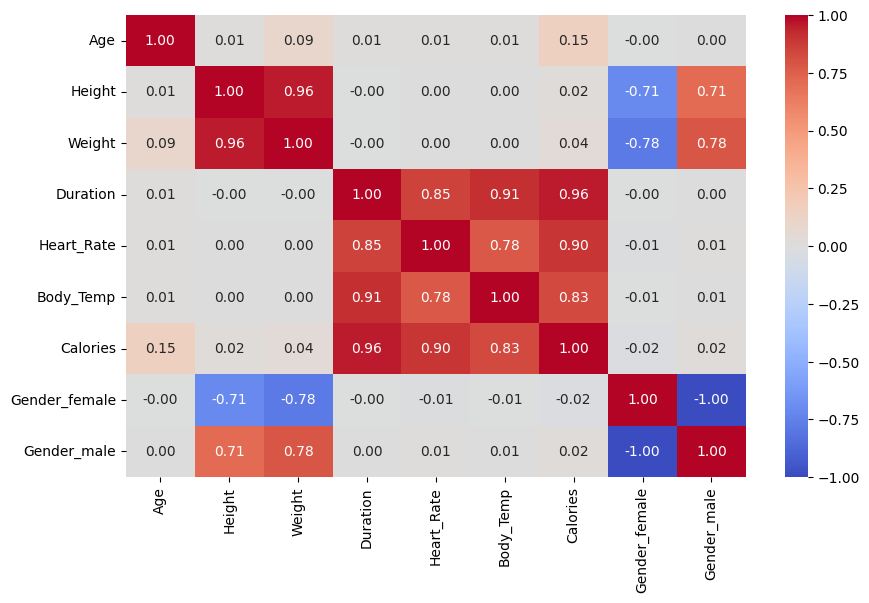

In [16]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.drop("User_ID", axis=1).corr(), annot=True, cmap="coolwarm", fmt=".2f")


* For the training dataset

<Axes: >

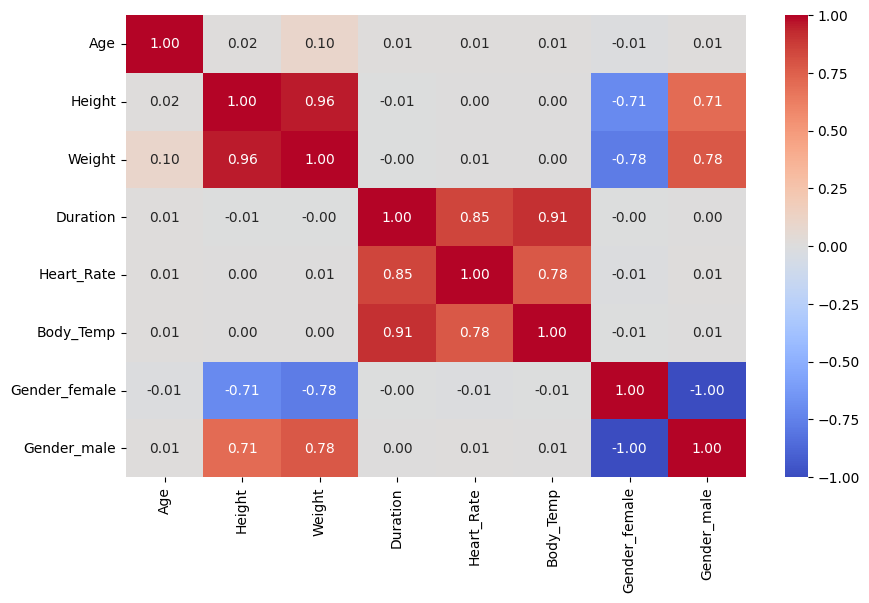

In [17]:
plt.figure(figsize=(10, 6))
sns.heatmap(X_train.corr(), annot=True, cmap="coolwarm", fmt=".2f")  

### Dropping the highly correlated features in X_train and X_test (if any)

* It's generally a good practice to apply the same feature engineering steps to both the training and testing datasets

In [18]:
def corelation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()  # It will give the correlation matrix
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:  # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr # returning set of column names

In [19]:
highly_correlated_features = corelation(X_train, 0.9)
highly_correlated_features

{'Body_Temp', 'Gender_male', 'Weight'}

In [20]:
X_train = X_train.drop(columns=highly_correlated_features)
X_test = X_test.drop(columns=highly_correlated_features)

### Model Training

In [21]:
model = XGBRegressor()
model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

### Evaluation

* I will use Mean Absolute Error (MSE) as the evaluation metric. It is the most commonly used metric for regression problems. 

* Also accuracy scores are not relevant for regression problems , unlike classification problems

In [22]:
# Predictions on training set
train_predictions = model.predict(X_train)

# Predictions on test set
test_predictions = model.predict(X_test)

# Calculate MAE for both sets
mae_train = mean_absolute_error(Y_train, train_predictions)
mae_test = mean_absolute_error(Y_test, test_predictions)

print(f"Mean Absolute Error - Training Set: {mae_train:.2f} calories")
print(f"Mean Absolute Error - Test Set: {mae_test:.2f} calories")



Mean Absolute Error - Training Set: 1.07 calories
Mean Absolute Error - Test Set: 1.64 calories


## Interpretation:

### Training Set Performance:

The MAE of 1.07 calories on the training set indicates that, on average,  model's predictions deviate by approximately 1.07 calories from the actual values in the training data. This is a relatively low MAE, suggesting that the model has learned well from the training data.
### Test Set Performance:

The MAE of 1.64 calories on the test set indicates that, on average,  model's predictions deviate by approximately 1.64 calories from the actual values in the test data. This is slightly higher than the training set MAE but still reasonably small.
### Comparison:

The fact that the test set MAE is somewhat higher than the training set MAE is expected, as the model has seen the training data during training. However, the difference between the training and test set MAE values is relatively small, suggesting that the model is generalizing well to new, unseen data.##
### Potential Overfitting:

The difference in MAE between the training and test sets is not excessively large, which is a good sign. A significant increase in MAE on the test set compared to the training set could indicate overfitting, but in this case, the difference is within a reasonable range.